In [10]:
# let's set up our environment
import numpy as np
import scipy as sp
import os

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io.wavfile import read # allows us to read in wave files
from scipy import signal
import sunau as au # allows us to read in .au files

1024
513


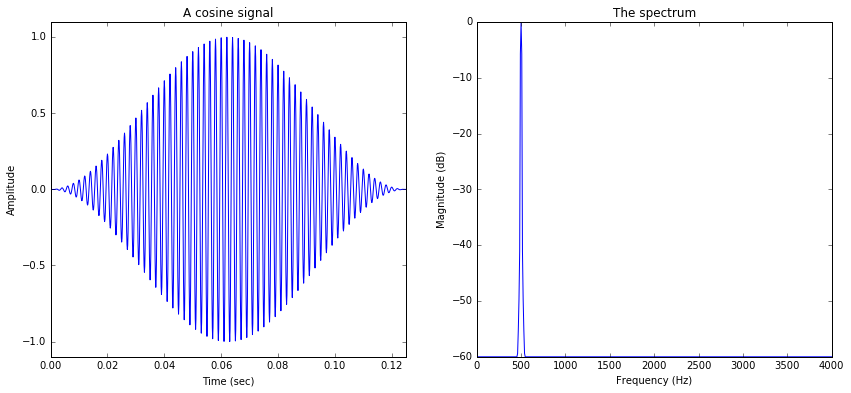

In [13]:
# let's calculate a simple FFT
fs = 8000 # sample rate
T = 1.0/fs # sample period
n = np.array(range(fs/8)) # sample indexes
f = 500; # fundamental frequency of sinusoid

# our signal
x = np.cos(2.0*np.pi*f*n*T)
x = x*signal.hann(len(x))

# let's plot it
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(n*T,x)
plt.axis([0.0,np.amax(n*T),-1.1,1.1])
plt.title('A cosine signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')

# get next power of 2 greater than length of signal - makes FFT faster
fftLen = np.int64(pow(2,np.ceil(np.log(len(x))/np.log(2))))

print fftLen

# compute the FFT
X = np.fft.fft(x,n=fftLen)
X = X[0:fftLen/2+1] # only keep positive frequencies

print len(X)

Xmag = np.absolute(X) # get absolute value (magnitude)
Xmag = 20*np.log10(Xmag) # convert to dB
Xmag = Xmag - np.amax(Xmag) # make 0 max value
Xmag[Xmag<-60] = -60 # ignore values below -60 dB

# array holding the frequency values at each FFT bin
freqs = np.linspace(0,fs/2,len(X))

# let's plot the spectrumm of the cosine wave
plt.subplot(1,2,2)
plt.plot(freqs,Xmag)
plt.title('The spectrum')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')

# what if we change cos to sin?
# what are all those humps?

22050 22050 22050
(661794,) (661504,) (661500,)
(88200,) (88200,) (88200,)


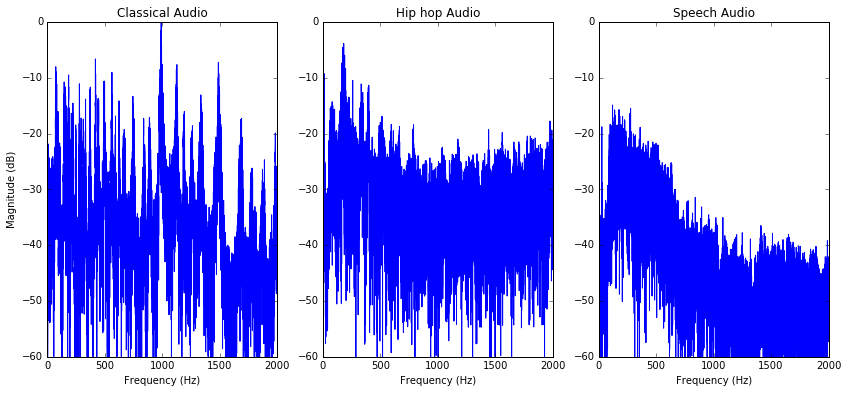

In [32]:
from scipy.io.wavfile import read # allows us to read in wave files

# read in the wave files
Classical = read("classical.00000.wav")
Hiphop = read("hiphop.00000.wav")
Speech = read("voices.wav")
# get the sample rates
ClassicalSR = Classical[0]
HiphopSR = Hiphop[0]
SpeechSR = Speech[0]

print ClassicalSR, HiphopSR, SpeechSR

SR = ClassicalSR # they match, we'll just use 1 of them
T = 1.0/SR; # sample period

# get the audio sample values
ClassicalVals = np.array(Classical[1],dtype=float)
HiphopVals = np.array(Hiphop[1],dtype=float)
SpeechVals = np.array(Speech[1],dtype=float)

print ClassicalVals.shape, HiphopVals.shape, SpeechVals.shape

# let's just work with the start-endth second(s) of audio
start = 6;
end = 10;
Classical1 = ClassicalVals[start*SR:end*SR]#*signal.hann((end-start)*SR)
Hiphop1 = HiphopVals[start*SR:end*SR]#*signal.hann((end-start)*SR)
Speech1 = SpeechVals[start*SR:end*SR]#*signal.hann((end-start)*SR)

print Classical1.shape, Hiphop1.shape, Speech1.shape

# determine fft length based on length of classical audio sample
fftLen = np.int64(pow(2,np.ceil(np.log(len(Classical1))/np.log(2))))

freqs = np.linspace(0,SR/2,len(range(fftLen/2+1)))
lastInd = len(freqs[freqs<2000])

# compute the FFTs
X1 = np.fft.fft(Classical1,n=fftLen)
X1 = X1[0:fftLen/2+1] # only keep positive frequencies
X2 = np.fft.fft(Hiphop1,n=fftLen)
X2 = X2[0:fftLen/2+1] # only keep positive frequencies
X3 = np.fft.fft(Speech1,n=fftLen)
X3 = X3[0:fftLen/2+1] # only keep positive frequencies

Xmag1 = np.absolute(X1) # get absolute value (magnitude)
Xmag1 = 20*np.log10(Xmag1) # convert to dB
Xmag1 = Xmag1 - np.amax(Xmag1) # make 0 max value
Xmag1[Xmag1<-60] = -60 # ignore values below -60 dB
Xmag2 = np.absolute(X2) # get absolute value (magnitude)
Xmag2 = 20*np.log10(Xmag2) # convert to dB
Xmag2 = Xmag2 - np.amax(Xmag2) # make 0 max value
Xmag2[Xmag2<-60] = -60 # ignore values below -60 dB
Xmag3 = np.absolute(X3) # get absolute value (magnitude)
Xmag3 = 20*np.log10(Xmag3) # convert to dB
Xmag3 = Xmag3 - np.amax(Xmag3) # make 0 max value
Xmag3[Xmag3<-60] = -60 # ignore values below -60 dB

# let's start plotting signals
plt.figure(figsize=(14, 6))
plt.subplot(1,3,1)
plt.plot(freqs[:lastInd],Xmag1[:lastInd])
plt.title('Classical Audio')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(1,3,2)
plt.plot(freqs[:lastInd],Xmag2[:lastInd])
plt.title('Hip hop Audio')
#plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.subplot(1,3,3)
plt.plot(freqs[:lastInd],Xmag3[:lastInd])
plt.title('Speech Audio')
#plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')